# Multiple-objective portfolio optimization

# INTRODUCTION

-  Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.
-  Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Example

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  1e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.8750000000000182


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Example

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.499999989554308


# Portfolio optimization

In [14]:
import os
import glob
import matplotlib.pyplot as plt

dataPath = "./data/Bundle1"

class Index:
    def __init__(self,name,runx,runy):
        self.name = name
        self.datax = runx
        self.datay = runy
        self.increase = 0
        self.pred_datax = []
        self.pred_datay = []
        
    def __str__(self) -> str:
        return self.name
    
stock_data=[]

for file in glob.glob(os.path.join(dataPath, "*.txt")):
    with open(file,'r') as rf:
        data = rf.readlines()
        stock_data.append(Index(data[0], [float(i.split()[0]) for i in data[2:]], [float(i.split()[1]) for i in data[2:]]))

## Predictions

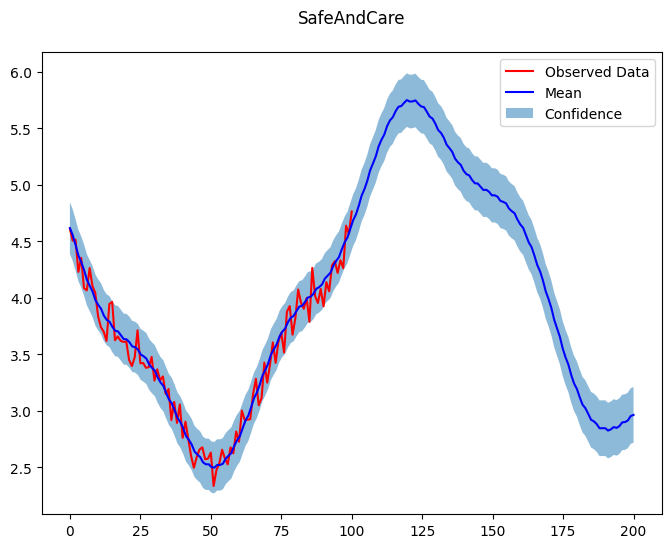

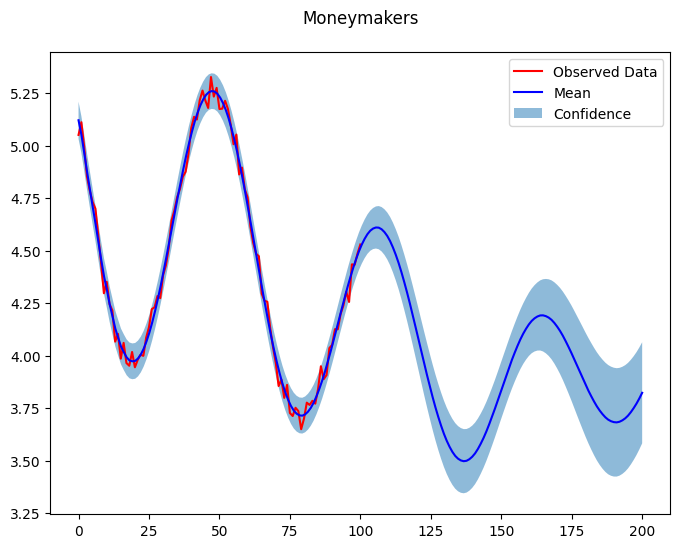

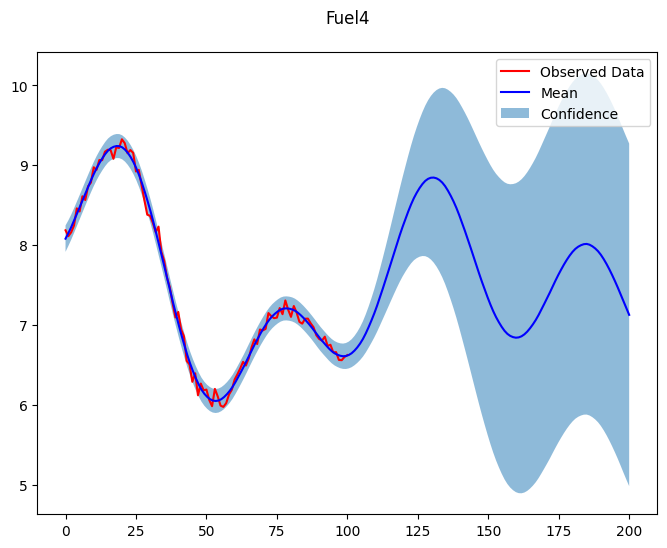

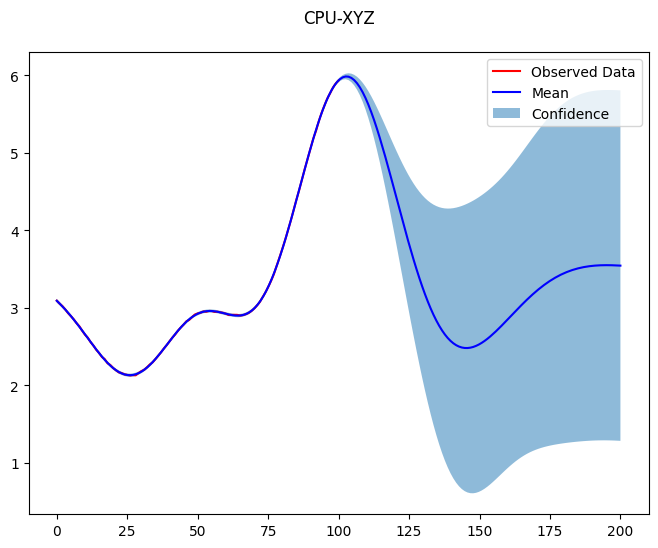

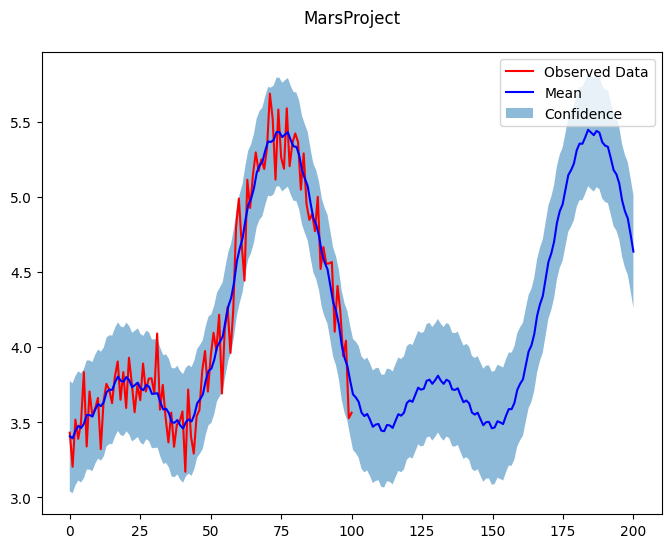

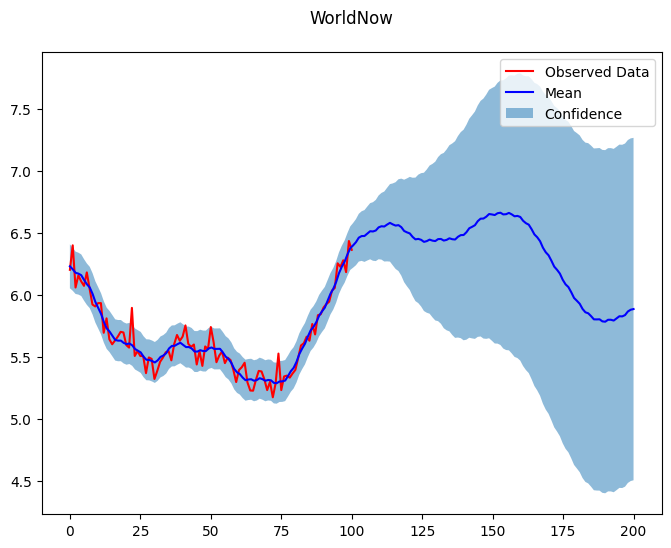

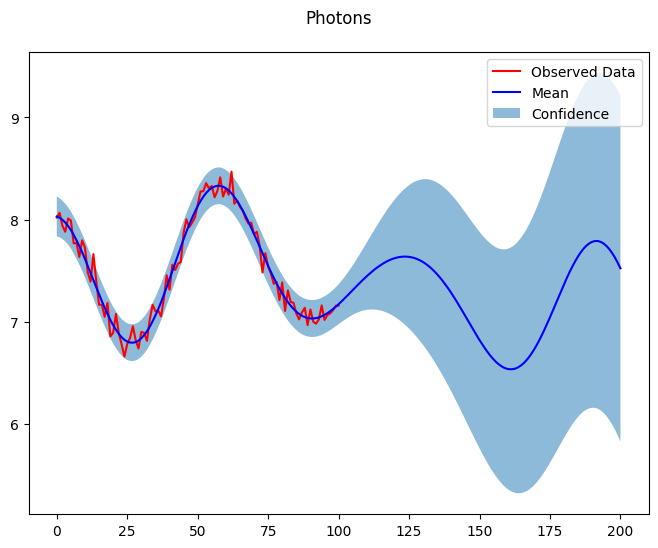

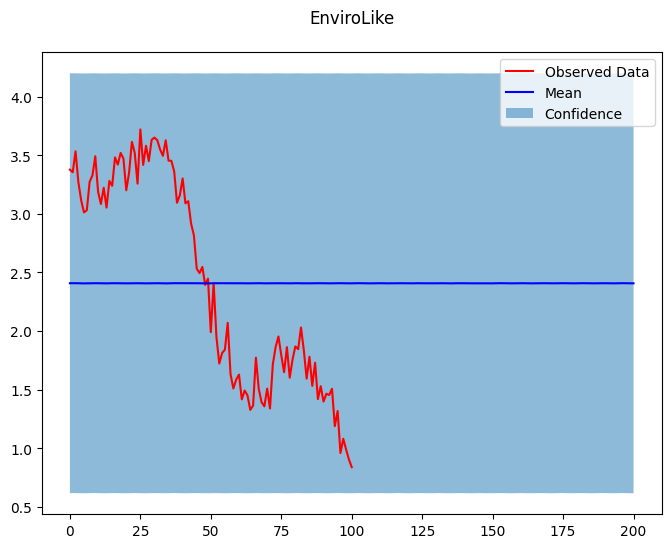

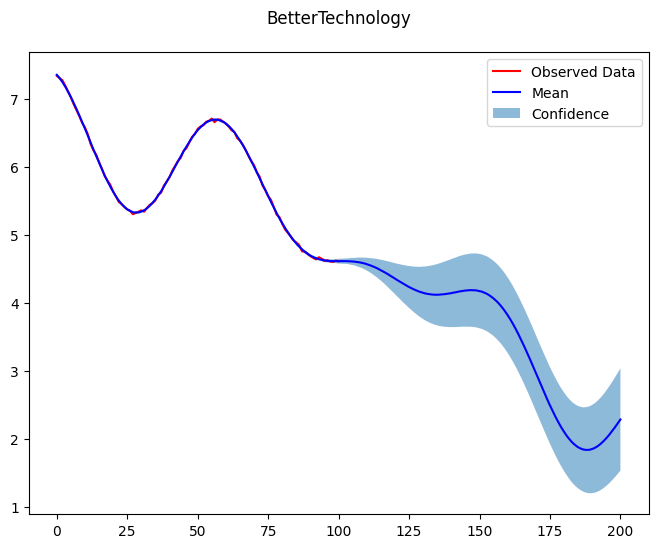

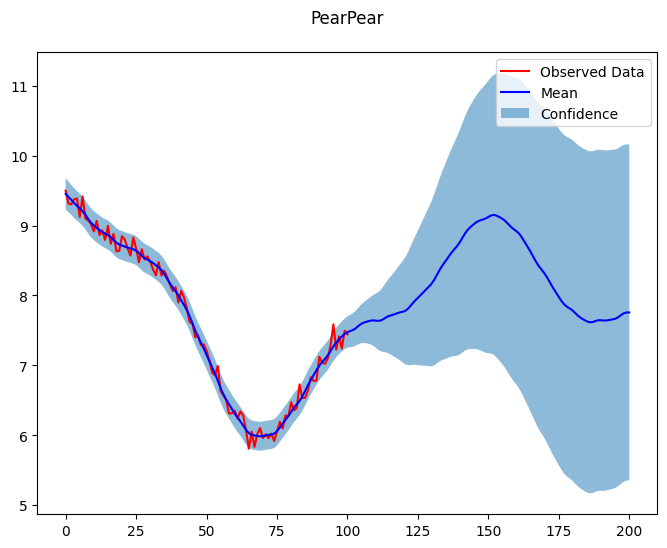

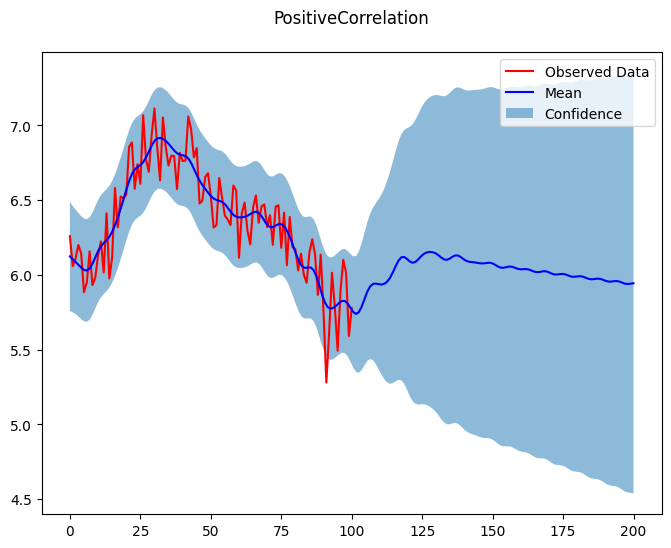

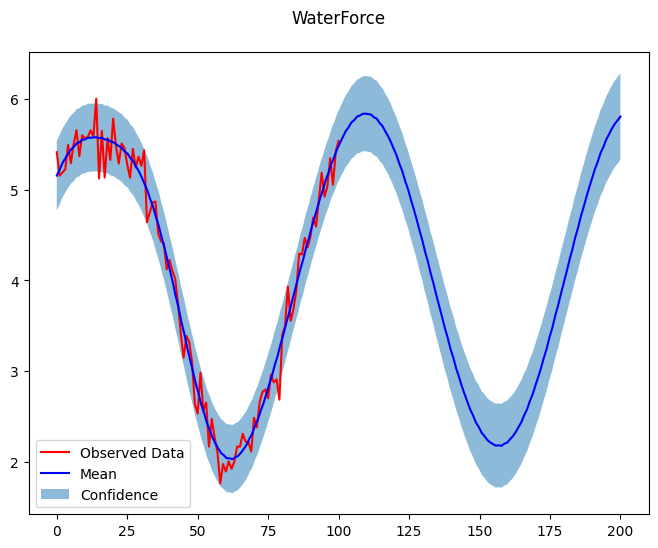

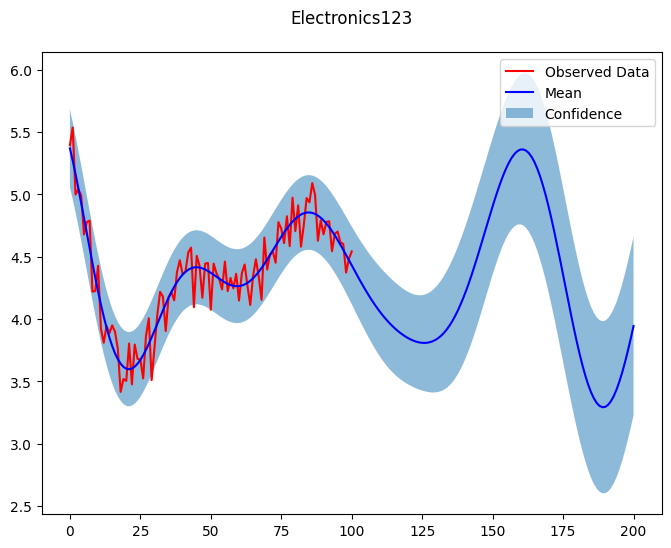

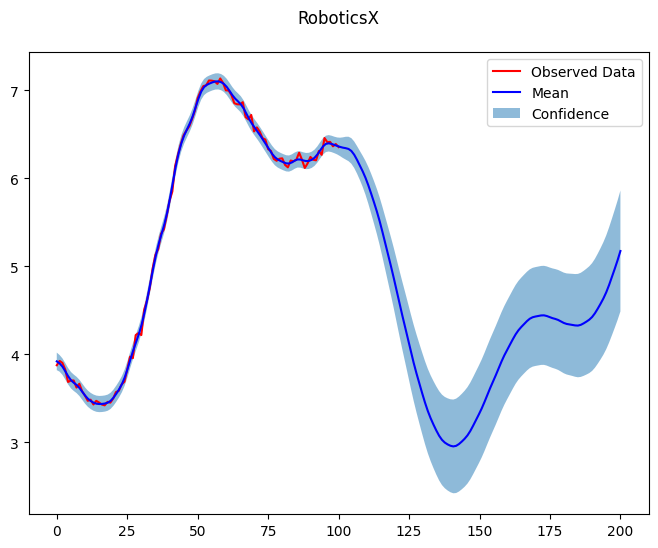

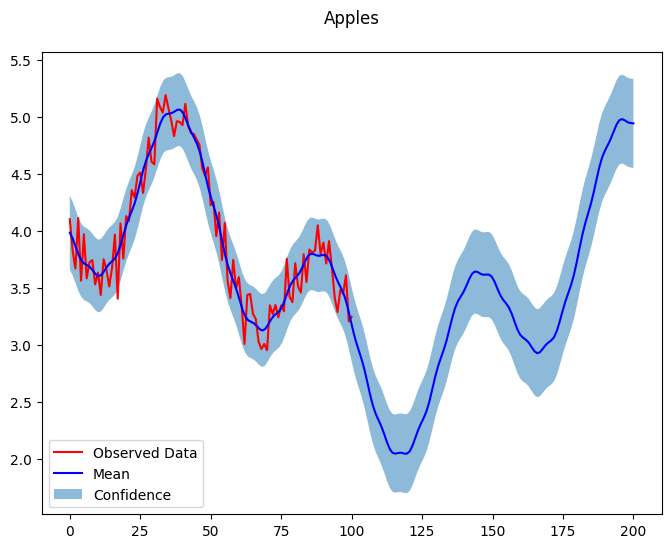

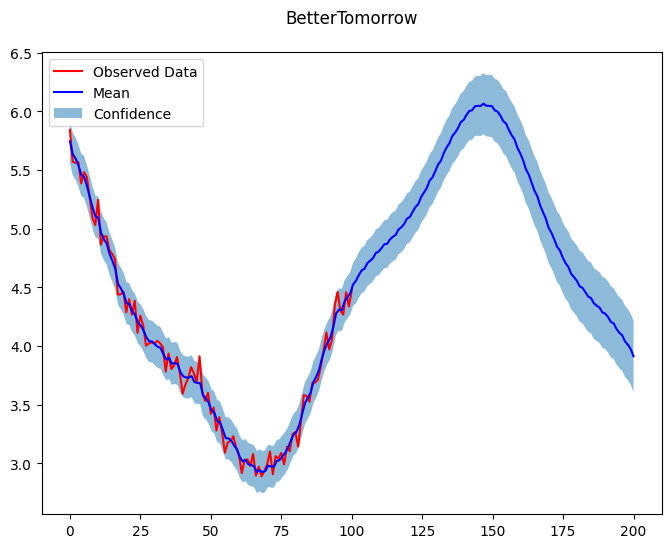

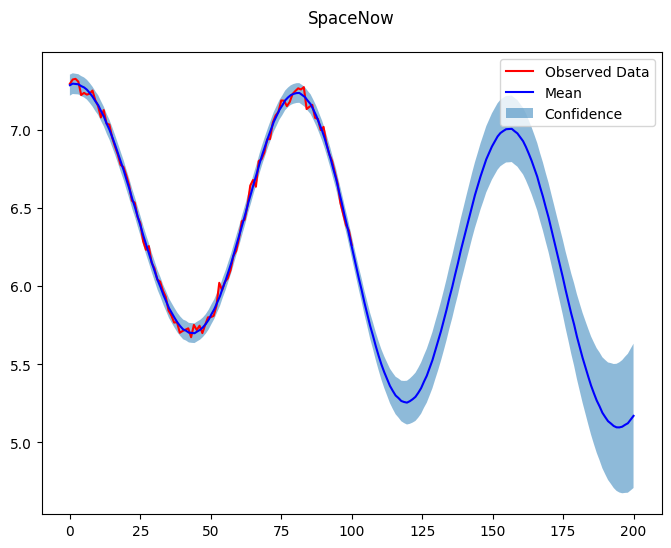

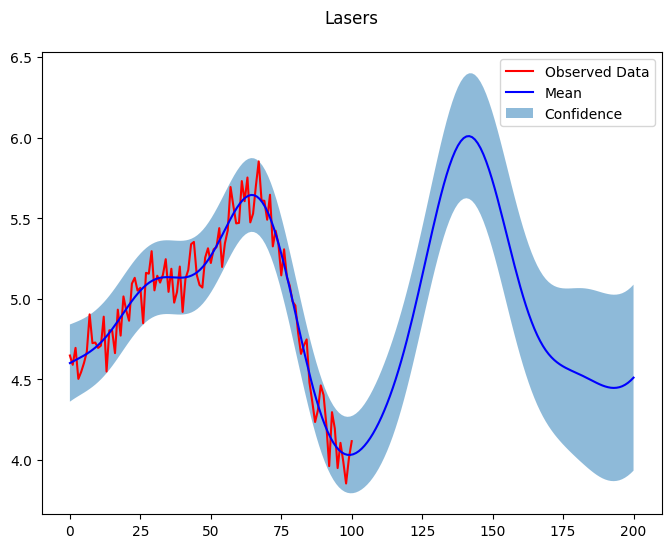

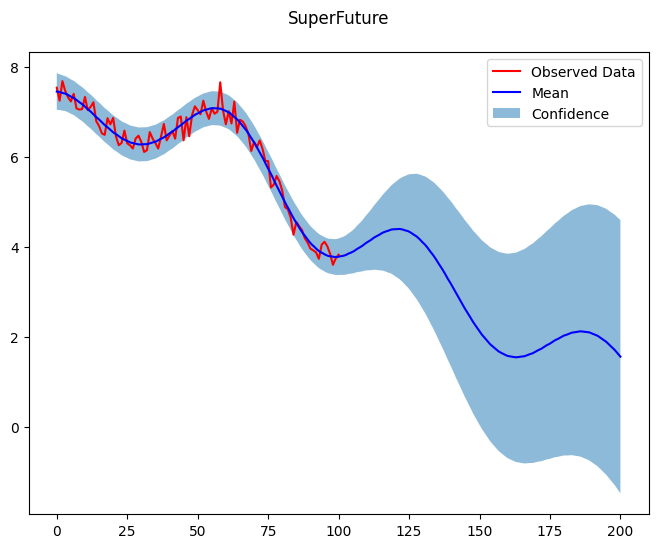

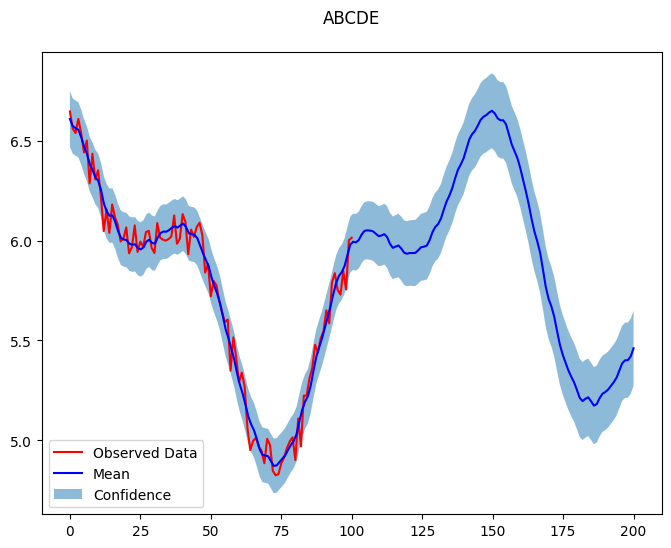

In [15]:
import gpytorch
import numpy as np
import torch

class PredictorGP(gpytorch.models.ExactGP):
    def __init__(self, x_train, y_train, likelihood):
        super(PredictorGP, self).__init__(x_train, y_train, likelihood)
        self.mean = gpytorch.means.ConstantMean() 
        self.cov = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=9) 
        self.cov.initialize_from_data(x_train, y_train) 
        
    def forward(self, x):
        # Evaluate the mean and kernel function at x
        mean_x = self.mean(x)
        cov_x = self.cov(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, cov_x) 
        
for company in stock_data:
    # Initialize the likelihood and model
    x = torch.Tensor(company.datax)
    y = torch.Tensor(company.datay)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = PredictorGP(x, y, likelihood)
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    n_iter = 1200
    for i in range(n_iter):
        optimizer.zero_grad()
        output = model(x)
        loss = -mll(output, y)
        loss.backward()
        optimizer.step()
    x_test = torch.linspace(0, 200, 200)

    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        f_preds = model(x_test)
        f_mean = f_preds.mean
        f_cov = f_preds.covariance_matrix
        
        observed_pred = likelihood(model(x_test))
        
        f, ax = plt.subplots(1, 1, figsize=(8, 6))

        lower, upper = observed_pred.confidence_region()
        plt.title(company.name)

        ax.plot(x.numpy(), y.numpy(), 'r-')

        company.pred_datax=list(x_test.numpy())
        company.pred_datay=list(observed_pred.mean.numpy())
        ax.plot(x_test.numpy(), observed_pred.mean.numpy(), 'b')

        ax.fill_between(x_test.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)

        ax.legend(['Observed Data', 'Mean', 'Confidence'])
        plt.show()

In [16]:
for company in stock_data:
    company.increase = (company.pred_datay[-1] - company.datay[-1]) / company.datay[-1]

risk_matrix = [[np.cov(np.stack((stock_data[i].datay, stock_data[j].datay), axis=0))[0][1]  for i in range(len(stock_data))] for j in range(len(stock_data))]

## Model

$
\begin{cases}
\displaystyle max \sum_{i=1}^n w_ir_i \\
\displaystyle min \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i \\
\end{cases}
$ <br>

$ \displaystyle \sum_{i=1}^n w_i = 1 $ <br>
$ \displaystyle w_i \in [0,1] \ \forall_{i}$ <br>

## Weighted Sum Method

$ \displaystyle min f_{s} = - w_{1}^{\star} \sum_{i=1}^n w_ir_i + w_{2}^{\star} \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>

### Solution when only risk matters

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

In [17]:
def WSM(weights):
    Q = 2.0 * matrix([[weights[0] * risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([-weights[1] * float(i.increase) for i in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    return solvers.qp(Q, c, G, h, A, b)

In [18]:
weights = [1.0, 0.0]
solLP = WSM(weights)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.2439e-03 -1.0325e+00  1e+00  2e-16  5e+00
 1:  3.7472e-03 -2.2798e-02  3e-02  5e-17  1e-01
 2:  1.4874e-03 -4.1056e-03  6e-03  2e-16  1e-02
 3:  8.1700e-04 -7.1015e-05  9e-04  2e-16  1e-03
 4:  6.5375e-04  4.7811e-04  2e-04  7e-17  2e-16
 5:  6.1755e-04  5.9336e-04  2e-05  6e-17  3e-16
 6:  6.0767e-04  6.0605e-04  2e-06  1e-16  4e-16
 7:  6.0684e-04  6.0681e-04  3e-08  9e-17  3e-16
Optimal solution found.
[ 5.68e-07]
[ 4.03e-02]
[ 2.53e-01]
[ 8.95e-02]
[ 2.33e-02]
[ 8.36e-05]
[ 5.73e-02]
[ 5.89e-02]
[ 1.82e-05]
[ 1.40e-02]
[ 1.28e-02]
[ 5.31e-06]
[ 2.57e-07]
[ 2.11e-01]
[ 1.98e-02]
[ 1.62e-06]
[ 2.96e-02]
[ 9.03e-02]
[ 6.47e-06]
[ 1.00e-01]

0.0006068407265176184


### Solution when only return matters

In [19]:
weights = [0.0, 1.0]
solLP = WSM(weights)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
[ 9.47e-09]
[ 1.12e-08]
[ 1.38e-08]
[ 9.31e-09]
[ 1.76e-08]
[ 1.20e-08]
[ 1.35e-08]
[ 1.00e+00]
[ 8.72e-09]
[ 1.34e-08]
[ 1.32e-08]
[ 1.35e-08]
[ 1.14e-08]
[ 1.09e-08]
[ 2.32e-08]
[ 1.15e-08]
[ 1.10e-08]
[ 1.41e-08]
[ 8.27e-09]
[ 1.18e-08]

-1.8713346773433206


### Pareto fronts

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
-1.8713346773433206
     pcost       dcost       gap    pres   dres
 0: -3.4343e+00 -2.6588e+00  8e+01  7e+00  6e+00
 1: -4.9370e-01 -2.4152e+00  2e+00  6e-15  1e-15
 2: -1.2782e+00 -1.6136e+00  3e-01  8e-16  1e-15
 3: -1.5983e+00 -1.6039e+00  6e-03  2e-16  1e-15
 4: -1.6031e+00 -1.6032e+00  6e-05  2e-16  1e-15
 5: -1.6032e+00 -1.6032e+00  6e-07  3e-16  7e-16
Optimal solution found.
-1.6031851012908802
     pcost       dcost       gap    pres   dres
 0: -2.4987e+00 -2.4291e+00  7e+01  6e+00  6e+00
 1: -3.9096e-01 -2.1805e+00  2e+00  2e-15  1e-15
 2: -9.3971e-01 -1.3566e+00  4e-01  3e-16  1e-15
 3: -1.3198e+00 -1.3376e+00  2e-0

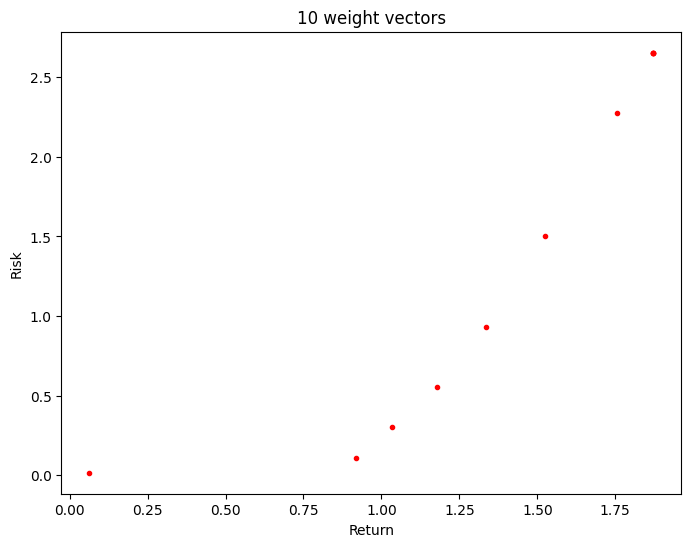

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
-1.8713346773433206
     pcost       dcost       gap    pres   dres
 0: -4.7252e+00 -2.8592e+00  9e+01  7e+00  6e+00
 1: -4.9190e-01 -2.6852e+00  2e+00  6e-15  2e-15
 2: -1.5161e+00 -1.8531e+00  3e-01  2e-16  1e-15
 3: -1.8403e+00 -1.8451e+00  5e-03  5e-17  9e-16
 4: -1.8445e+00 -1.8445e+00  5e-05  1e-16  9e-16
 5: -1.8445e+00 -1.8445e+00  5e-07  1e-16  7e-16
Optimal solution found.
-1.8445197546838599
     pcost       dcost       gap    pres   dres
 0: -4.5343e+00 -2.8416e+00  8e+01  7e+00  6e+00
 1: -4.9993e-01 -2.6489e+00  2e+00  5e-15  1e-15
 2: -1.5038e+00 -1.8263e+00  3e-01  4e-17  2e-15
 3: -1.8138e+00 -1.8182e+00  4e-0

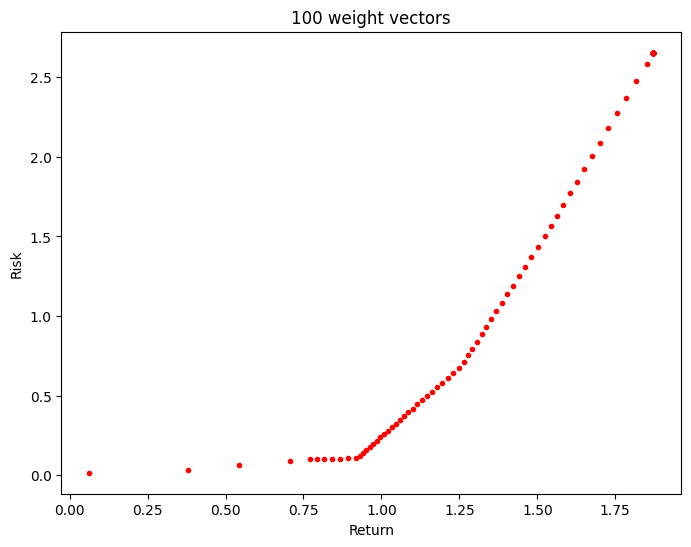

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
-1.8713346773433206
     pcost       dcost       gap    pres   dres
 0: -4.8300e+00 -2.8662e+00  9e+01  7e+00  6e+00
 1: -4.8954e-01 -2.7045e+00  2e+00  9e-16  2e-15
 2: -1.5208e+00 -1.8665e+00  3e-01  2e-16  1e-15
 3: -1.8536e+00 -1.8585e+00  5e-03  2e-16  9e-16
 4: -1.8579e+00 -1.8579e+00  5e-05  2e-16  1e-15
 5: -1.8579e+00 -1.8579e+00  5e-07  7e-17  9e-16
Optimal solution found.
-1.8579272163506406
     pcost       dcost       gap    pres   dres
 0: -4.7252e+00 -2.8592e+00  9e+01  7e+00  6e+00
 1: -4.9190e-01 -2.6852e+00  2e+00  6e-15  2e-15
 2: -1.5161e+00 -1.8531e+00  3e-01  2e-16  1e-15
 3: -1.8403e+00 -1.8451e+00  5e-0

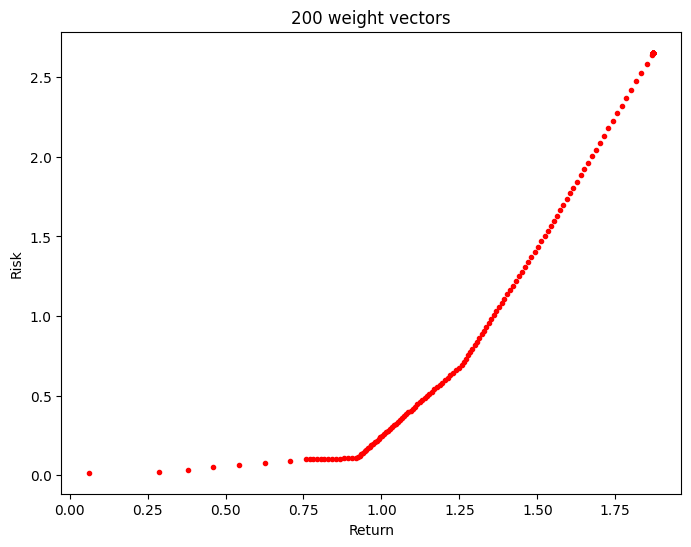

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
-1.8713346773433206
     pcost       dcost       gap    pres   dres
 0: -4.8965e+00 -2.8696e+00  9e+01  7e+00  6e+00
 1: -4.8930e-01 -2.7164e+00  2e+00  9e-15  2e-15
 2: -1.5235e+00 -1.8745e+00  4e-01  1e-16  1e-15
 3: -1.8615e+00 -1.8666e+00  5e-03  2e-17  2e-15
 4: -1.8659e+00 -1.8660e+00  5e-05  4e-17  9e-16
 5: -1.8660e+00 -1.8660e+00  5e-07  1e-16  1e-15
Optimal solution found.
-1.865971692886108
     pcost       dcost       gap    pres   dres
 0: -4.8518e+00 -2.8674e+00  9e+01  7e+00  6e+00
 1: -4.8934e-01 -2.7084e+00  2e+00  1e-15  1e-15
 2: -1.5217e+00 -1.8692e+00  3e-01  2e-16  1e-15
 3: -1.8562e+00 -1.8612e+00  5e-03

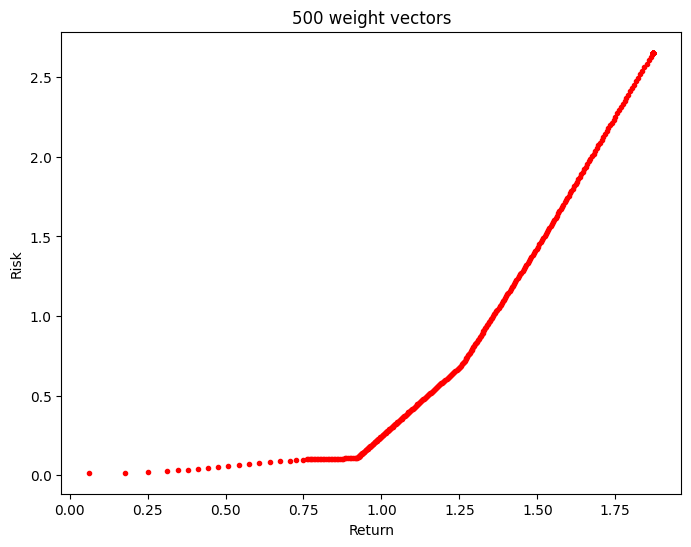

     pcost       dcost       gap    pres   dres
 0: -4.9427e+00 -2.8713e+00  9e+01  7e+00  6e+00
 1: -4.8985e-01 -2.7246e+00  2e+00  6e-15  1e-15
 2: -1.5254e+00 -1.8799e+00  4e-01  2e-16  1e-15
 3: -1.8668e+00 -1.8720e+00  5e-03  5e-16  7e-16
 4: -1.8713e+00 -1.8713e+00  5e-05  2e-16  8e-16
 5: -1.8713e+00 -1.8713e+00  5e-07  1e-16  8e-16
Optimal solution found.
-1.8713346773433206
     pcost       dcost       gap    pres   dres
 0: -4.9194e+00 -2.8705e+00  9e+01  7e+00  6e+00
 1: -4.8950e-01 -2.7205e+00  2e+00  2e-15  1e-15
 2: -1.5244e+00 -1.8772e+00  4e-01  2e-16  1e-15
 3: -1.8642e+00 -1.8693e+00  5e-03  3e-16  9e-16
 4: -1.8686e+00 -1.8687e+00  5e-05  2e-16  1e-15
 5: -1.8687e+00 -1.8687e+00  5e-07  1e-16  1e-15
Optimal solution found.
-1.8686531850894874
     pcost       dcost       gap    pres   dres
 0: -4.8965e+00 -2.8696e+00  9e+01  7e+00  6e+00
 1: -4.8930e-01 -2.7164e+00  2e+00  9e-15  2e-15
 2: -1.5235e+00 -1.8745e+00  4e-01  1e-16  1e-15
 3: -1.8615e+00 -1.8666e+00  5e-0

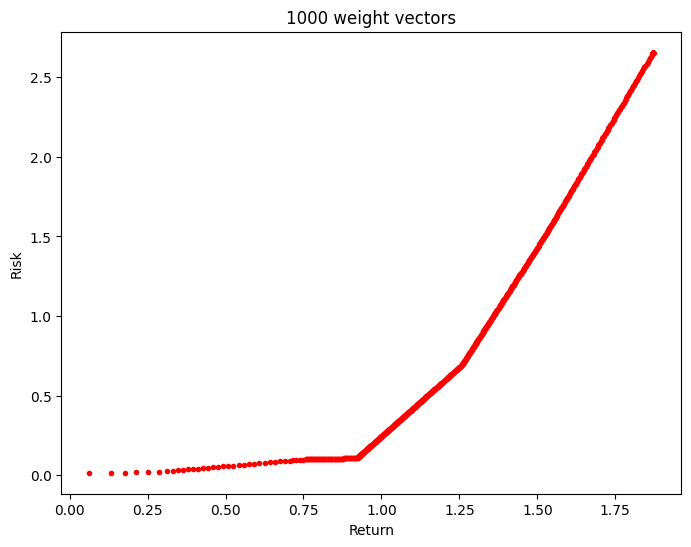

In [20]:
for splits in [10.0, 100.0, 200.0, 500.0, 1000.0]:
    weight_vector = []
    factor = 1.0 / splits
    value = 0.0
    for i in range(int(splits) + 1):
        weight_vector.append([value, round(1.0 - value, 3)])
        value = round(value + factor, 3)
        
    result=[]
    for weights in weight_vector:
        solLP = WSM(weights)
        
        f = list(solLP['x'])
        print(solLP['primal objective'])
        result.append([
                sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
            ])
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])

    return_v = min(x) / (max(x)-min(x))
    risk_v = min(y) / (max(y)-min(y))
    result=[]
    for weights in weight_vector:
        solLP = WSM(weights)
        
        f = list(solLP['x'])
        print(solLP['primal objective'])
        
        result.append([
                sum([float(stock_data[i].increase) * f[i] for i in range(len(stock_data))]),
                sum([sum(risk_matrix[i]) * f[i] for i in range(len(stock_data))]),
            ])
    x=[]
    y=[]
    for i in result:
        x.append(i[0])
        y.append(i[1])
    f, ax = plt.subplots(1, 1, figsize=(8, 6))

    ax.plot(x, y, '.r')
    ax.set_title(f"{int(splits)} weight vectors")
    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
    plt.show()

## Epsilon-constrained method

$ \displaystyle min  f_{risk} = \sum_{i=1}^n \sum_{j=1}^n w_i w_j\sigma_i $ <br>
$ s.t. $ <br>
$ \displaystyle \sum_{i=1}^n w_ir_i \geq return $ <br>
$ ... $

In [21]:
def ECM(epsilon):
    Q = 2.0 * matrix([[risk_matrix[i][j] for i in range(len(stock_data))] for j in range(len(stock_data))])
    c = matrix([0.0 for _ in stock_data])
    G = matrix([[0.0 if j != i else -1.0 for j in range(len(stock_data))] + [-stock_data[i].increase] for i in range(len(stock_data))])
    h = matrix([0.0 for i in stock_data] + [-epsilon])
    A = matrix([1.0 for j in range(len(stock_data))], (1, len(stock_data)))
    b = matrix(1.0)
    return solvers.qp(Q, c, G, h, A, b)

In [22]:
epsilon = 0.0
solLP = ECM(epsilon)

print(solLP['x'])
print(solLP['primal objective'])

     pcost       dcost       gap    pres   dres
 0:  4.4344e-03 -1.0426e+00  1e+00  6e-17  6e+00
 1:  3.9327e-03 -2.4660e-02  3e-02  6e-17  2e-01
 2:  1.4879e-03 -4.1271e-03  6e-03  4e-16  1e-02
 3:  8.2146e-04 -5.4890e-05  9e-04  2e-16  1e-03
 4:  6.6591e-04  4.3451e-04  2e-04  9e-17  1e-04
 5:  6.1817e-04  5.9190e-04  3e-05  2e-16  4e-16
 6:  6.0777e-04  6.0596e-04  2e-06  7e-17  2e-16
 7:  6.0684e-04  6.0681e-04  3e-08  7e-17  3e-16
Optimal solution found.
[ 6.35e-07]
[ 4.03e-02]
[ 2.53e-01]
[ 8.95e-02]
[ 2.33e-02]
[ 9.21e-05]
[ 5.73e-02]
[ 5.89e-02]
[ 2.74e-05]
[ 1.40e-02]
[ 1.28e-02]
[ 6.15e-06]
[ 2.69e-07]
[ 2.11e-01]
[ 1.98e-02]
[ 1.84e-06]
[ 2.96e-02]
[ 9.03e-02]
[ 8.96e-06]
[ 1.00e-01]

0.0006068449575302546
